## **MAGPIE**

**What is this tool?**
This tool is designed to generate sequence logos based on the distance from a target residue or ligand in a given dataset of pdbs. The distance is calculated using the alpha carbon positions between protein interfaces or all non-hydrogen atoms in the case of ligands. The tool also includes a 3D visualizer that plots the entire target structure and highlights the residues within the specified distance constraint. There are two options for coloring the interacting residues based on [Amino colour](http://acces.ens-lyon.fr/biotic/rastop/help/colour.htm#aminocolours) and [Shapely colour](http://acces.ens-lyon.fr/biotic/rastop/help/colour.htm#shapelycolours).

**Required Inputs:**
- PDB Files: Two examples are provided on GitHub, one for protein-protein interactions and one for ligand-protein interactions.
- Target Chain from PDB: The program uses the first file in the directory to upload the target structure.
- Interacting Chain from PDB: This chain identifier must be the same across all PDB files.
- Specify Target Type: Indicate whether the target is a ligand or a protein.
- Target Residue Index (for proteins) or Unique Atom Names (for ligands): Provide the target residue index for proteins or unique atom names for ligands. Alternatively, you can input 'All' to consider all residues/atoms.

**Usage:**
Please execute the cells in numerical order. If you wish to load a different dataset, you can start from the upload step to reload the new data set.


## **1. Run required packages ↓**

##  **2. Upload data, and process**

run next cell to input path to directory containing all PDB files:

Example usages:

Type either **'Protein Example'** or **'Ligand Example'** to run example sets.


In [1]:
!pip install Logomaker
!pip install numpy == 1.18.5
import pandas as pd
import sequence_logo_main
import helper_functions
import os
import glob

zsh:1: = not found


In [2]:
pdb_files = input("Enter path to files: ")
pdb_files = glob.glob(f"{pdb_files}/*.pdb")
print(pdb_files)

Enter path to files: Protein Example
['Protein Example/C121_7K8X.pdb', 'Protein Example/BD-604_7CHF.pdb', 'Protein Example/C1A-B12_7KFV.pdb', 'Protein Example/C144_7K90.pdb', 'Protein Example/B38_7BZ5.pdb', 'Protein Example/CV07-250_6XKQ.pdb', 'Protein Example/Sb45_7KGJ.pdb', 'Protein Example/S304_7JX3.pdb', 'Protein Example/REGN10933_6XDG.pdb', 'Protein Example/C105_6XCM.pdb', 'Protein Example/CC12.1_6XC3.pdb', 'Protein Example/CR3014-C8_7KZB.pdb', 'Protein Example/C110_7K8V.pdb', 'Protein Example/C102_7K8M.pdb', 'Protein Example/COVA2-39_7JMP.pdb', 'Protein Example/Nb20_7JVB.pdb', 'Protein Example/COVA1-16_7JMW.pdb', 'Protein Example/S2H13_7JV6.pdb', 'Protein Example/P4A1_7CJF.pdb', 'Protein Example/2H2_7DK4.pdb', 'Protein Example/H11-H4_6ZH9.pdb', 'Protein Example/EY6A_6ZCZ.pdb', 'Protein Example/Sb68_7KLW.pdb', 'Protein Example/H014_7CAI.pdb', 'Protein Example/Sb16_7KGK.pdb', 'Protein Example/P2C-1F11_7CDI.pdb', 'Protein Example/S2A4_7JVC.pdb', 'Protein Example/U_7KN5.pdb', 'Protei

## 3. Select target and binding chains.
Select target chain, binding chain, select whether the target is a ligand or protein, atom names (if ligand) or residue index (if protein) to visualize, separate by commas.

You can also type 'all' to plot all residues or atoms.

**Example usage:**
- For protein example use A for target chain and B for binding chain.
- For ligand example use X for target chain and A for binding chain. Use is_ligand function





In [6]:
target_chain = input("Target chain: ")
binding_chain = input("Binding chain: ")
to_plot = input("which residues or atoms to plot (type 'all' to see entire structure): ")
is_ligand = input("Is ligand?: (True or False): ")
distance = int(input("How many Å from target to graph?: " ))
threads = int(input("How many threads to use? Type '1' for default: "))
if is_ligand == "True":
    is_ligand = True
else:
    is_ligand = False

if to_plot == "all":
  plot_list = "all"

else:
    if is_ligand:
      plot_list = [str(x) for x in to_plot.split(",")]
    else:
      plot_list =[int(x) for x in to_plot.split(",")]

Target chain: A
Binding chain: B
which residues or atoms to plot (type 'all' to see entire structure): all
Is ligand?: (True or False): False
How many Å from target to graph?: 8
How many threads to use? Type '1' for default: 1


In [7]:
from matplotlib.pyplot import plot
df_target,df_binder = sequence_logo_main.plot(pdb_files, target_chain,binding_chain,is_ligand,plot_list, distance, threads)

## **5. Select residues or atoms to generate sequence logos.**
Enter the residue number or carbon names to graph and separated by a commas.
If there are no residues within the given range, next cell will not execute.


In [8]:
sequence_logo_targets = input("Residues to graph: ")

if is_ligand:
  plot_list = [str(x) for x in sequence_logo_targets.split(",")]
else:
  plot_list =[int(x) for x in sequence_logo_targets.split(",")]


Residues to graph: 458


##### **6.  Generate sequence logos**
Select if you'd like to only see the combained logo.

Only combined logo? (True or False): True
0.0
0.0


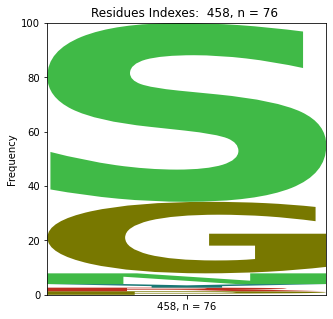

In [11]:

combined = input("Only combined logo? (True or False): ")
if combined == 'True':
    combined = True
else: 
    combined = False
sequence_logo_main.sequence_logos(df_target,df_binder, plot_list, is_ligand,combined, distance)
